# Income prediction using Machine Learning

In this tutorial, you explore developing machine learning models using Python.
The data set that will be used is called UCI: Adult – Predict Income. 
This data set is meant to be used to predict whether an individual has an income of less than 50K or more than 50K based on census data. 

## In this notebook

 - Find the API Docs for the running version of Pandas & scikit-learn
 - Run data exploration
 - Run data visualization
 - Run data preparation
 - Train models
 - Evaluate models
 - Save and load trained models


Let's take a look at what data we have here

In [2]:
#%ls

Install Pandas & Scikit-learn libraries

In [3]:
#!pip install pandas scikit-learn numpy matplotlib seaborn

# Data Exploration 

In [7]:
import pandas as pd

In [8]:
# Load the data from the CSV to a Panda's Dataframe

filePath = 'adult.csv'
 
adult_df=pd.read_csv(filePath)

In [9]:
# Using head() method with an argument to display more rows of the dataset
adult_df.head(n=20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Note: Notice that row 14 in the dataset contains a question mark for an unknown value, many other rows in the data set are also missing values. Later on when prepossessing the data, all rows that contain missing values will be dropped. 

In [10]:
# Using tail() to display last rows of the dataset
adult_df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [11]:
# Using dtypes to display the datatypes of each column 
adult_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [12]:
# Using describe to display the summary statistics of the numeric columns 
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Visualization

Seaborn will be used to create plots in order to visualize the dataset. Using Seaborn many different types of plots can be created. To browse the available visualization types, visit the Seaborn gallery at https://seaborn.pydata.org/examples/index.html. In this exercise two types of plots will be used, a count plot and a violin plot. 

1.	Import the Seaborn library and import pyplot from the matplotlib module.
2.	Assign a value to the style parameter in the Seaborn set method to change the appearance of the plot. The five Seaborn styles are darkgrid, whitegrid, dark, white and ticks. In the example below darkgrid is used.


In [13]:
#import necessary modules
import seaborn as sb
from matplotlib import pyplot as plt

#set the plot theme
sb.set(style = "darkgrid") 

C:\Users\jack\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


3.	Create a count plot using the countplot method to see the number of males and females in each income category. Have SEX as the x value and SALARY as the hue. 


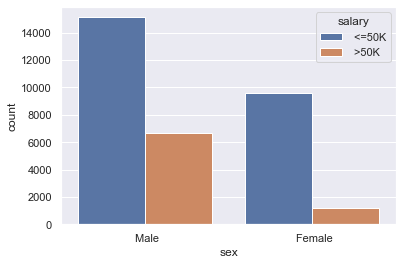

In [14]:
#create a count plot
sb.countplot('sex', data=adult_df, hue = 'salary')
#display plot
plt.show()

4.	Create a violin plot using the violinplot method to see the age distribution for each income category.  Have SALARY as the x value, AGE as the y value, and the df_data_1 as the data set.

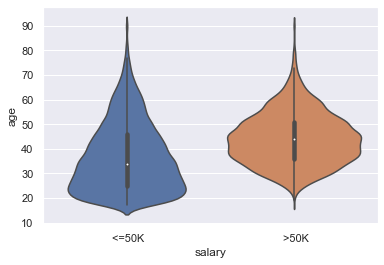

In [15]:
#create and disply a violin plot
sb.violinplot(x = "salary", y = "age", data = adult_df)
plt.show()

5.	Set the hue of the violin plot to SEX and set split to True to see the age distribution based on gender. 

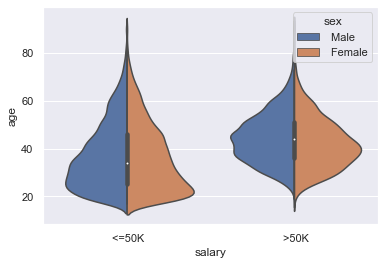

In [16]:
#create and display a violin plot
sb.violinplot(x = "salary", y = "age", hue="sex", data = adult_df, split=True)
plt.show()

6. Find correlation between columns

In [19]:
def plot_correlation(df, size=10):
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

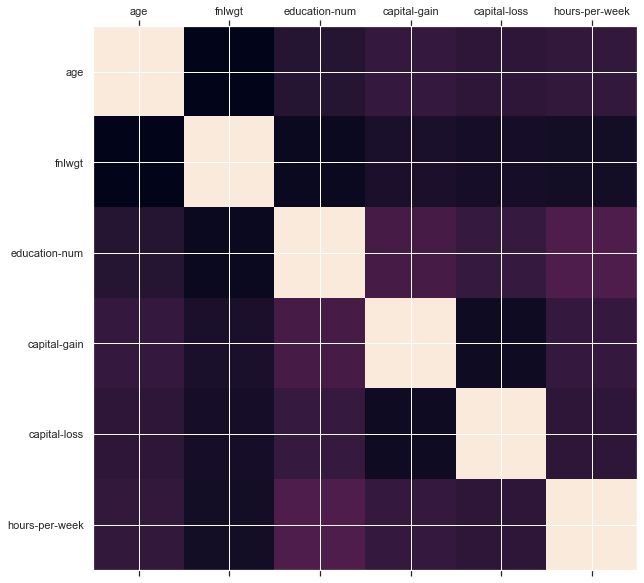

In [20]:
plot_correlation(adult_df)

# Data Preparation

1.	Now, we will be preparing to build a prediction model using scikit-learn. First, we need to clean up the data.  Recall how some rows contained ‘ ?’ instead of a value. We will begin by removing these rows.

I.	Import numpy

II.	Three different columns, workclass, occupation and native_country, contain ‘ ?’. Mark values that contain ‘ ?’ as  missing by replacing the ‘ ?’ with NaN. 

III.	Drop all rows that contain missing values using the dropna method.


In [27]:
print(adult_df['workclass'].value_counts())
print ('-'*40)
print(adult_df['occupation'].value_counts())
print ('-'*40)
print(adult_df['country'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64
----------------------------------------
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                 

In [28]:
import numpy

# mark ' ?' values as missing or NaN
adult_df['workclass'] = adult_df['workclass'].replace(' ?', numpy.NaN)
adult_df['occupation'] = adult_df['occupation'].replace(' ?', numpy.NaN)
adult_df['country'] = adult_df['country'].replace(' ?', numpy.NaN)

# drop rows with missing values
adult_df.dropna(inplace=True)

print(adult_df['workclass'].value_counts())
print ('-'*40)
print(adult_df['occupation'].value_counts())
print ('-'*40)
print(adult_df['country'].value_counts())

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
----------------------------------------
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64
----------------------------------------
 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                   

2.	Also recall how many of the columns in the dataset contained Object (String) data values. We are now going to convert these values to lower case. For each String column use pandas map method to apply the lower method to all record. Use the head method to see the results.

In [29]:
adult_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [30]:
#convert all String values to lowercase
string_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship',  'race', 'sex', 'country', 'salary']

for col in string_columns:
    adult_df[col] = adult_df[col].map(lambda x: x.lower())

#display the initial records that are now lowercase
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50k
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k
3,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k
4,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k


3.	Convert the columns that have Object/String datatypes into numeric values using dummy encoding. Reminder: to see which columns are Strings you can use the dtype method described earlier. 


In [34]:
# Convert String Columns to numeric using one hot encoding
# use pd.concat to join the new columns with your original dataframe
all_numeric_df = pd.concat([adult_df,pd.get_dummies(adult_df[string_columns], prefix=string_columns, drop_first=True)],axis=1)

In [35]:
all_numeric_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       ...
       'country_ puerto-rico', 'country_ scotland', 'country_ south',
       'country_ taiwan', 'country_ thailand', 'country_ trinadad&tobago',
       'country_ united-states', 'country_ vietnam', 'country_ yugoslavia',
       'salary_ >50k'],
      dtype='object', length=106)

In [36]:
all_numeric_df.dtypes

age                          int64
workclass                   object
fnlwgt                       int64
education                   object
education-num                int64
                             ...  
country_ trinadad&tobago     uint8
country_ united-states       uint8
country_ vietnam             uint8
country_ yugoslavia          uint8
salary_ >50k                 uint8
Length: 106, dtype: object

In [37]:
# now drop the original String column (you don't need it anymore)
all_numeric_df.drop(string_columns,axis=1, inplace=True)

In [38]:
all_numeric_df.dtypes

age                         int64
fnlwgt                      int64
education-num               int64
capital-gain                int64
capital-loss                int64
                            ...  
country_ trinadad&tobago    uint8
country_ united-states      uint8
country_ vietnam            uint8
country_ yugoslavia         uint8
salary_ >50k                uint8
Length: 97, dtype: object

4.	Instead of transforming all attributes to numeric as in the previous step, we can also transform all attributes to Categorical/String types depending on the machine learning algorithm we are using. Try this on the age attribute. Instead of having age values ranging from 17 to 90, break the values into ten bins.  

I.	Instantiate the KBinsDiscretizer Object. Set n_bin to 10, encode to ordinal, and strategy to uniform. 

II.	Call the fit_transform method on the values in the AGE column. Print the results and notice that the values are assigned a bin from 0 to 9 based on how high the number is. 


In [39]:
from sklearn import preprocessing

#create an instance of the KBinsDiscretizer Object
bd = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

#bin continuous data into intervals and print the result
print(bd.fit_transform([[x] for x in adult_df['age']]))



[[3.]
 [4.]
 [2.]
 ...
 [5.]
 [0.]
 [4.]]


Note: For the rest of this exercise we will be using the original numeric attributes, however, if we had wanted to update the values in the dataset we could have assigned the result to df_data_1['AGE'], instead of printing it.

# Training Set & Test Set
1.	Separate the data into feature and target variables. 

I.	The PREDICTION column will be the target set. 

II.	Select all columns other than the PREDICTION column and assign them to a variable called data. 

III.	Assign the target set equal to the PREDICTION column.


In [40]:
#assign features columns to a DF variable
numeric_features_df = all_numeric_df.loc[:, all_numeric_df.columns != 'salary_ >50k']

#Set target set equal to prediction column
target = all_numeric_df['salary_ >50k']

numeric_features_df
    

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ local-gov,workclass_ private,workclass_ self-emp-inc,workclass_ self-emp-not-inc,...,country_ portugal,country_ puerto-rico,country_ scotland,country_ south,country_ taiwan,country_ thailand,country_ trinadad&tobago,country_ united-states,country_ vietnam,country_ yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


2.	Split the data set into training and testing sets, with 20% of the data being used as the test data and 80% used as the training data.  

I.	Import the train_test_split model from sklearn.model_selection.

II.	Split the data using the train_test_split method.



In [41]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(numeric_features_df,target, test_size = 0.2, random_state = 10)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (19303, 96)(19303,)
Validation dataset: (4826, 96)(4826,)
Test dataset: (6033, 96)(6033,)


# Building Models

1. Let's select few algorithm used for classification

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [48]:
models = []
#model_names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM','KNN']
model_names = ['LR','Random Forest','GaussianNB','DecisionTreeClassifier','KNN', 'Bagging']

models.append((LogisticRegression(solver='lbfgs', max_iter=200)))
models.append((RandomForestClassifier(n_estimators=10)))
#models.append((MLPClassifier()))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
#models.append((SVC()))
models.append((KNeighborsClassifier(n_neighbors=3)))
#A bagging ensemble of KNeighborsClassifier base estimators, each built on random subsets of 50% of the samples and 50% of the features.
models.append((BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)))

print(*models, sep = "\n")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
GaussianNB(priors=None, var_smoothing=1e-09)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,


2. Run K-Cross Validation to Build the models and find the one with the highest accuracy.

In [53]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

kfold = model_selection.KFold(n_splits=10)
trained_models=[]

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i], X_train, y_train, cv=kfold, scoring='accuracy')
    print ('-'*40)
    print ('{0}[Model Validation Scores]: {1}, {2}'.format(model_names[i], cv_result, round(cv_result.mean(), 5)))
    
    #Fit a model for prediction.
    trained_model = models[i].fit(X_train,y_train)
    trained_models.append(trained_model)
    prediction = trained_model.predict(X_test)
    acc_score = accuracy_score(y_test, prediction)     
    print ('{0}[Model Test Score]: {1}'.format(model_names[i], round(acc_score, 5)))

----------------------------------------
LR[Model Validation Scores]: [0.79078198 0.79544278 0.78922838 0.80310881 0.77772021 0.78756477
 0.79119171 0.78601036 0.79326425 0.81295337], 0.79273
LR[Model Test Score]: 0.79214
----------------------------------------
Random Forest[Model Validation Scores]: [0.84722941 0.84412222 0.85033661 0.8507772  0.82072539 0.83834197
 0.83471503 0.83056995 0.84974093 0.84663212], 0.84132
Random Forest[Model Test Score]: 0.84386
----------------------------------------
GaussianNB[Model Validation Scores]: [0.78560331 0.79492491 0.78715691 0.8015544  0.77564767 0.78860104
 0.79015544 0.77979275 0.79170984 0.77979275], 0.78749
GaussianNB[Model Test Score]: 0.79446
----------------------------------------
DecisionTreeClassifier[Model Validation Scores]: [0.81149663 0.8042465  0.8120145  0.82072539 0.78860104 0.8
 0.80103627 0.80518135 0.81968912 0.81761658], 0.80806
DecisionTreeClassifier[Model Test Score]: 0.81634
----------------------------------------


3. Let's predict our test data and see prediction results

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [55]:
randomForestModel = RandomForestClassifier(n_estimators=100)
randomForestModel = trained_models[1]
prediction = randomForestModel.predict(X_test)

In [56]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.843858776727996
----------------------------------------
Confusion Matrix:
[[4202  307]
 [ 635  889]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4509
           1       0.74      0.58      0.65      1524

    accuracy                           0.84      6033
   macro avg       0.81      0.76      0.78      6033
weighted avg       0.84      0.84      0.84      6033



4. Visualize model performance using a library called yellowbrick.

In [57]:
#install yellowbrick
#!pip install yellowbrick


In [58]:
#import the necessary module 
from yellowbrick.classifier import ClassificationReport


Create a classification report for the RandomForest algorithm

I.	Instantiate the Classification Report instance, passing in the RandomForest Object and the PREDICTION classes

II.	Pass the training sets into the fit method 

III.	Pass the test sets into the score method

IV.	Using the poof method to display the results


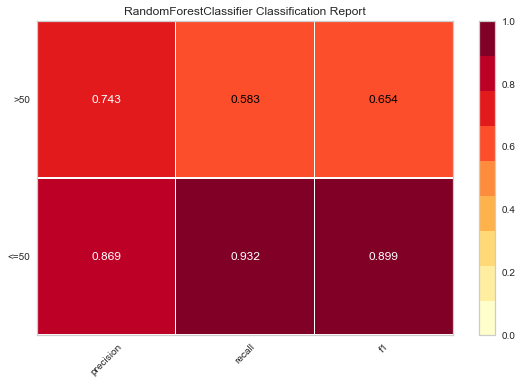

In [59]:
#Instantiate the classification model and visualizer
visualizer = ClassificationReport(randomForestModel, classes=['<=50','>50'])

#Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
 
#Evaluate the model on the test data
visualizer.score(X_test, y_test) 

# Draw/show/poof the data
g = visualizer.poof() 


# Saving the trained model

In [60]:
#import the pickle library
import pickle

In [61]:
# save the model to disk
filename = 'finalized_randomForestModel.mdl'
pickle.dump(randomForestModel, open(filename, 'wb'))
 

# Load the model later

In [62]:
# load the model from disk
filename = 'finalized_randomForestModel.mdl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

prediction = randomForestModel.predict(X_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

0.843858776727996
----------------------------------------
Accuracy score:
0.843858776727996
----------------------------------------
Confusion Matrix:
[[4202  307]
 [ 635  889]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4509
           1       0.74      0.58      0.65      1524

    accuracy                           0.84      6033
   macro avg       0.81      0.76      0.78      6033
weighted avg       0.84      0.84      0.84      6033



Summary
--
What we have done in this notebook:

* Find the API Docs for the running version of Pandas & scikit-learn
* Run data exploration
* Run data visualization
* Run data preparation
* Train models
* Evaluate models
* Save and load trained models
 